In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import tensorly as tl
from tensorly import random
import os


In [7]:
dataset_path = '../03.skgest-mpipe-slim'

sub_nums = [i for i in range(1,3)]
g_nums = [i for i in range(22,25)]
trials = [i for i in range(1,3)]
cams = [i for i in range(1,2)]



ds_dict = form_partial_ds_dict(dataset_path, sub_nums, g_nums, trials, cams)






ds_dict was inisialized!


In [8]:
df = ds_dict['P01G23T01C01']['sk']
df = df[df.columns[df.columns.str.match('joint__[l].*')]]
df

,joint__left_hand__wrist__x,joint__left_hand__wrist__y,joint__left_hand__wrist__z,joint__left_hand__thumb_cmc__x,joint__left_hand__thumb_cmc__y,joint__left_hand__thumb_cmc__z,joint__left_hand__thumb_mcp__x,joint__left_hand__thumb_mcp__y,joint__left_hand__thumb_mcp__z,joint__left_hand__thumb_ip__x,...,joint__left_hand__pinky_mcp__z,joint__left_hand__pinky_pip__x,joint__left_hand__pinky_pip__y,joint__left_hand__pinky_pip__z,joint__left_hand__pinky_dip__x,joint__left_hand__pinky_dip__y,joint__left_hand__pinky_dip__z,joint__left_hand__pinky_tip__x,joint__left_hand__pinky_tip__y,joint__left_hand__pinky_tip__z
0,0.5440,0.8239,0.0,0.5348,0.8341,-0.0016,0.5307,0.8498,-0.0023,0.5303,...,-0.0001,0.5493,0.8730,0.0003,0.5456,0.8775,0.0016,0.5429,0.8779,0.0026
1,0.5440,0.8240,0.0,0.5346,0.8337,-0.0016,0.5305,0.8498,-0.0022,0.5301,...,0.0002,0.5496,0.8732,0.0007,0.5459,0.8772,0.0020,0.5433,0.8772,0.0031
2,0.5437,0.8242,0.0,0.5345,0.8340,-0.0017,0.5304,0.8499,-0.0026,0.5299,...,-0.0004,0.5494,0.8735,-0.0003,0.5456,0.8773,0.0010,0.5431,0.8771,0.0021
3,0.5437,0.8242,0.0,0.5344,0.8334,-0.0020,0.5303,0.8492,-0.0028,0.5297,...,0.0004,0.5490,0.8734,0.0007,0.5453,0.8769,0.0020,0.5430,0.8765,0.0031
4,0.5433,0.8245,0.0,0.5338,0.8336,-0.0016,0.5297,0.8498,-0.0023,0.5292,...,-0.0004,0.5485,0.8747,-0.0002,0.5446,0.8781,0.0012,0.5422,0.8775,0.0024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.5422,0.8234,0.0,0.5329,0.8319,-0.0015,0.5285,0.8481,-0.0021,0.5280,...,-0.0004,0.5474,0.8726,-0.0003,0.5437,0.8764,0.0010,0.5413,0.8766,0.0020
117,0.5419,0.8237,0.0,0.5326,0.8326,-0.0014,0.5282,0.8483,-0.0019,0.5277,...,-0.0003,0.5473,0.8724,-0.0001,0.5438,0.8759,0.0013,0.5415,0.8759,0.0024
118,0.5418,0.8238,0.0,0.5325,0.8324,-0.0014,0.5282,0.8482,-0.0019,0.5276,...,-0.0005,0.5471,0.8726,-0.0003,0.5436,0.8765,0.0009,0.5411,0.8770,0.0020
119,0.5418,0.8238,0.0,0.5325,0.8322,-0.0017,0.5281,0.8482,-0.0024,0.5276,...,-0.0005,0.5470,0.8728,-0.0005,0.5434,0.8765,0.0008,0.5409,0.8767,0.0018


In [15]:
df.index[df.isna().sum(axis=1) == 21]

Int64Index([67, 69], dtype='int64')

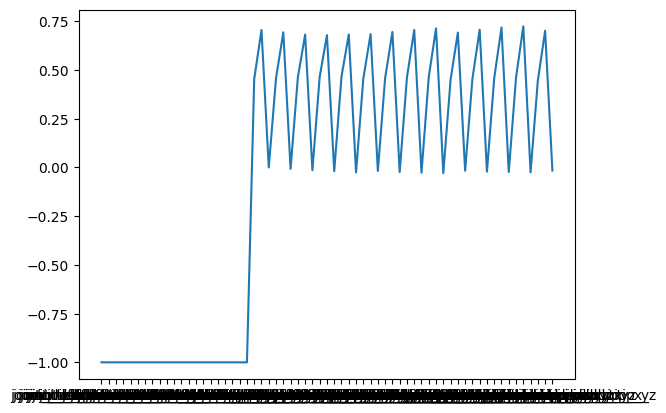

In [21]:
plt.plot(df.loc[67, :].fillna(-1))

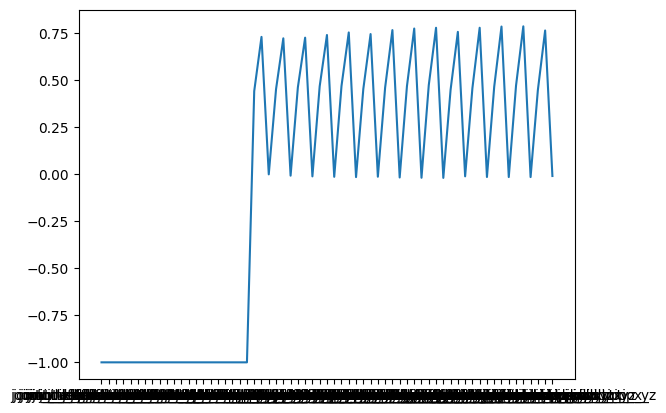

In [22]:
plt.plot(df.loc[69, :].fillna(-1))

In [24]:
df.columns[0:24]

Index(['joint__left_hand__wrist__x', 'joint__left_hand__wrist__y',
       'joint__left_hand__wrist__z', 'joint__left_hand__thumb_cmc__x',
       'joint__left_hand__thumb_cmc__y', 'joint__left_hand__thumb_cmc__z',
       'joint__left_hand__thumb_mcp__x', 'joint__left_hand__thumb_mcp__y',
       'joint__left_hand__thumb_mcp__z', 'joint__left_hand__thumb_ip__x',
       'joint__left_hand__thumb_ip__y', 'joint__left_hand__thumb_ip__z',
       'joint__left_hand__thumb_tip__x', 'joint__left_hand__thumb_tip__y',
       'joint__left_hand__thumb_tip__z',
       'joint__left_hand__index_finger_mcp__x',
       'joint__left_hand__index_finger_mcp__y',
       'joint__left_hand__index_finger_mcp__z',
       'joint__left_hand__index_finger_pip__x',
       'joint__left_hand__index_finger_pip__y',
       'joint__left_hand__index_finger_pip__z',
       'joint__left_hand__index_finger_dip__x',
       'joint__left_hand__index_finger_dip__y',
       'joint__left_hand__index_finger_dip__z'],
      dtype='obj

<AxesSubplot:>

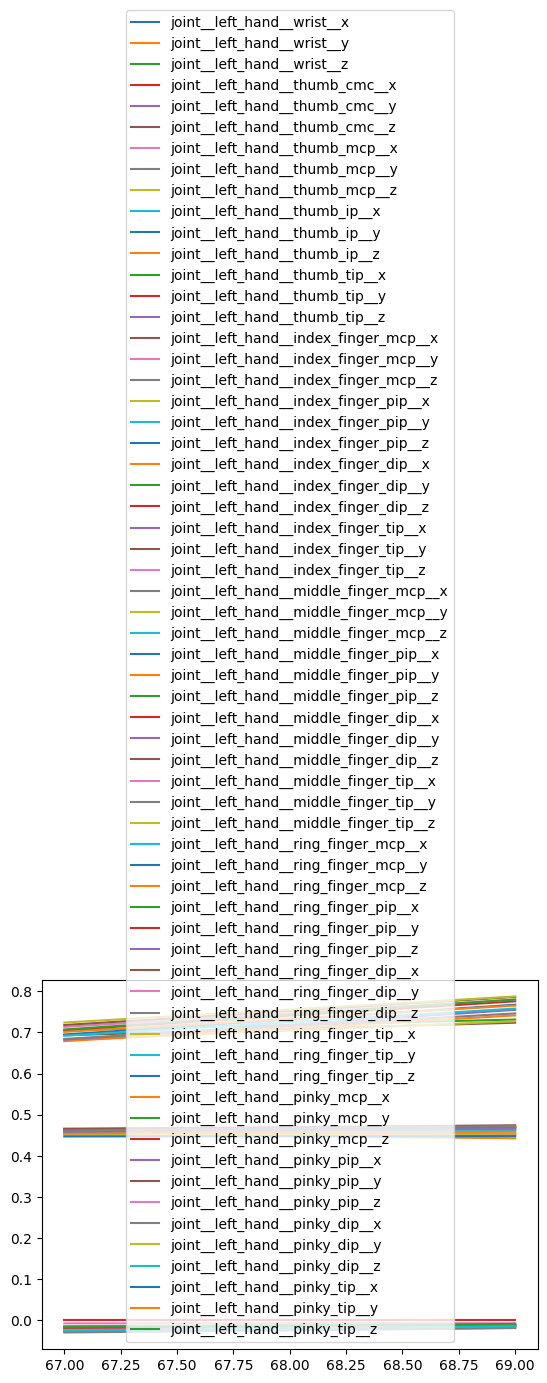

In [17]:
df.loc[[67, 69]].plot()

In [11]:
print(list(ds_dict['P01G23T01C01']['sk'])

['joint__body__nose__x', 'joint__body__nose__y', 'joint__body__nose__z', 'joint__body__left_eye_inner__x', 'joint__body__left_eye_inner__y', 'joint__body__left_eye_inner__z', 'joint__body__left_eye__x', 'joint__body__left_eye__y', 'joint__body__left_eye__z', 'joint__body__left_eye_outer__x', 'joint__body__left_eye_outer__y', 'joint__body__left_eye_outer__z', 'joint__body__right_eye_inner__x', 'joint__body__right_eye_inner__y', 'joint__body__right_eye_inner__z', 'joint__body__right_eye__x', 'joint__body__right_eye__y', 'joint__body__right_eye__z', 'joint__body__right_eye_outer__x', 'joint__body__right_eye_outer__y', 'joint__body__right_eye_outer__z', 'joint__body__left_ear__x', 'joint__body__left_ear__y', 'joint__body__left_ear__z', 'joint__body__right_ear__x', 'joint__body__right_ear__y', 'joint__body__right_ear__z', 'joint__body__mouth_left__x', 'joint__body__mouth_left__y', 'joint__body__mouth_left__z', 'joint__body__mouth_right__x', 'joint__body__mouth_right__y', 'joint__body__mouth

In [6]:
SK_KEY = 'sk'

def form_full_ds_dict(dataset_path, dataset_type='codedflat'):
    if dataset_type == 'codedflat':
        ds_dict = _form_full_ds_dict_from_codedflat(dataset_path)
    else:
        f"Error! dataset_type={dataset_type} is not implemented!"
        ds_dict = None
    return ds_dict


def form_partial_ds_dict(dataset_path, subs, gestures,  trials,  cams=[1], dataset_type='codedflat', ds_dict=None):
    if dataset_type == 'codedflat':
        ds_dict = _form_partial_ds_dict_from_codedflat(dataset_path, sub_nums=subs, g_nums=gestures,
                                                    trials=trials,  cams=cams, ds_dict=ds_dict)
    else:
        f"Error! dataset_type={dataset_type} is not implemented!"
        ds_dict = None
    return ds_dict
    

def _form_full_ds_dict_from_codedflat(dataset_path):
    print("Warinig! codedflat dataset is not implimented yet!")
    return None

def _form_partial_ds_dict_from_codedflat(dataset_path, sub_nums, g_nums,  trials,  cams, ds_dict=None):
    # print("Warinig! codedflat dataset is not implimented yet!")
    file_ext = '.csv'
    sub_codes = [f'P{sub:02d}' for sub in sub_nums]
    g_codes = [f'G{g_num:02d}' for g_num in g_nums]
    trial_codes = [f'T{trial:02d}' for trial in trials]
    cam_codes = [f'C{trial:02d}' for trial in trials]
    g_ids = [sub_code + g_code + trial_code + cam_code for sub_code in sub_codes
                                                                        for g_code in g_codes
                                                                        for trial_code in trial_codes
                                                                        for cam_code in cam_codes]
    
    if ds_dict is None:
        ds_dict = {}
        print('ds_dict was inisialized!')
    else:
        print('ds_dict will be updated!')
    
    for g_id in g_ids:
        data_file_path = os.path.join(dataset_path, g_id + file_ext) 
        df = pd.read_csv(data_file_path)
        if g_id not in ds_dict.keys():
            ds_dict[g_id] = {}
        ds_dict[g_id][SK_KEY] = df
    
    return ds_dict
    

In [6]:
files

['P01G01T01C01.csv',
 'P01G01T01C02.csv',
 'P01G01T02C01.csv',
 'P01G01T02C02.csv',
 'P01G02T01C01.csv',
 'P01G02T01C02.csv',
 'P01G02T02C01.csv',
 'P01G02T02C02.csv',
 'P02G01T01C01.csv',
 'P02G01T01C02.csv',
 'P02G01T02C01.csv',
 'P02G01T02C02.csv',
 'P02G02T01C01.csv',
 'P02G02T01C02.csv',
 'P02G02T02C01.csv',
 'P02G02T02C02.csv']